In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [6]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from SSMuLA.zs_analysis import ZS_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE


%matplotlib inline

# Custom colormap for the MSE row, using greens
cmap_mse = LinearSegmentedColormap.from_list(
    "mse_cmap_r", ["#FFFFFF", "#9bbb59"][::-1], N=100
)  # dark to light green

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "bwg",
    [
        PRESENTATION_PALETTE_SATURATE["blue"],
        "white",
        PRESENTATION_PALETTE_SATURATE["green"],
    ],
    N=100,
)

custom_cmap_r = LinearSegmentedColormap.from_list(
    "bwg_r",
    [
        sns.dark_palette("seagreen").as_hex()[-1],
        "white",
        sns.color_palette("Blues").as_hex()[-1],
    ],
    N=100,
)

de_metrics = ["mean_all", "fraction_max"]

simple_des = {
    "recomb_SSM": "Recomb",
    "single_step_DE": "Single step",
    "top96_SSM": "Top96 recomb",
}

In [7]:
def plot_zs_corr(
    n_mut_cutoff="all",
    lib_list=[
        "DHFR",
        "ParD2",
        "ParD3",
        "T7",
        "TEV",
        "GB1",
        "TrpB3D",
        "TrpB3E",
        "TrpB3F",
        "TrpB3G",
        "TrpB3I",
        "TrpB4",
    ],
    zs_df_dir = "results/zs_comb_5/none/scale2max/",
):

    corr_dict = {}
    for lib in lib_list:

        lib_csv = os.path.join(zs_df_dir, n_mut_cutoff, f"{lib}.csv")

        df = pd.read_csv(lib_csv)
        corr_dict[lib] = df[ZS_OPTS].corr(method="spearman", min_periods=1)

    zs_names = [ZS_OPTS_LEGEND[z] for z in ZS_OPTS]
    avg_corr_df = pd.DataFrame(
        np.nanmean(np.stack(list(corr_dict.values())), axis=0),
        index=zs_names,
        columns=zs_names,
    )
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(avg_corr_df, dtype=bool))
    # Modifying the mask to exclude the diagonal
    np.fill_diagonal(mask, False)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(6, 4))

    # Draw the heatmap with the mask and correct aspect ratio
    hm = sns.heatmap(
        avg_corr_df,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        cbar_kws={"shrink": 0.8},
        linewidths=0.8,
        square=True,
        vmin=0,
        vmax=1,
    )  # Setting vmin and vmax
    cbar = hm.collections[0].colorbar
    # Add a title to the color bar
    cbar.set_label(r"Spearman's $\rho$", rotation=270, labelpad=20)

    # Setting vmin and vmax
    ax.set_xlabel("ZS predictor")
    ax.set_ylabel("ZS predictor")
    # Add titles and labels as necessary
    plt.title(f"ZS correlations for {n_mut_cutoff}", fontweight="bold")
    plt.show()

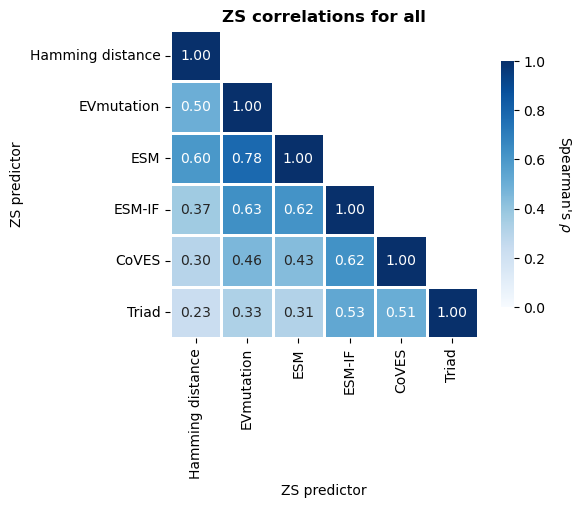

In [8]:
plot_zs_corr(n_mut_cutoff="all")

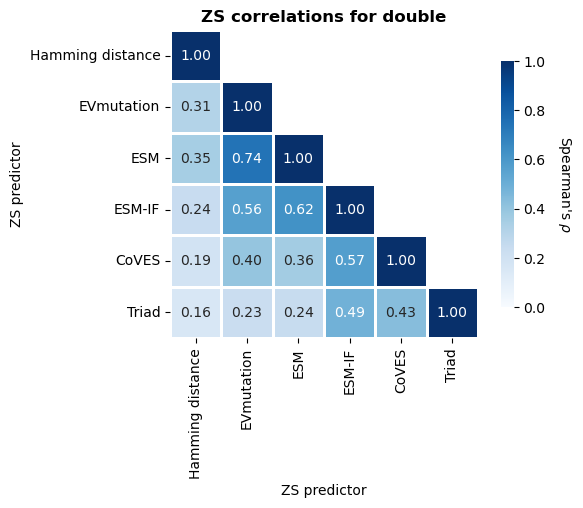

In [9]:
plot_zs_corr(n_mut_cutoff="double")

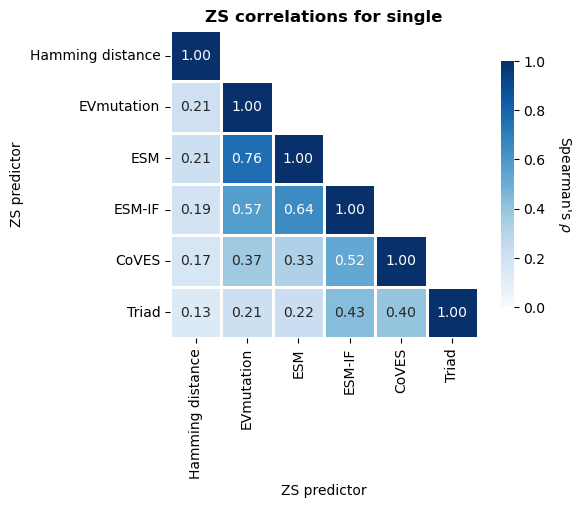

In [10]:
plot_zs_corr(n_mut_cutoff="single")